***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [8]:
dados = pd.read_csv('dados\dados.csv')

### Visualize o conteúdo do DataFrame

In [9]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [10]:
classes = [dados.Renda.min(), 2*788, 5*788, 15*788, 25*788, dados.Renda.max()]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [11]:
labels = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [12]:
frequencia = pd.value_counts(
       pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest = True)
        )
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [13]:
percentual = pd.value_counts(
       pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest = True),
        normalize = True
        ) * 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [14]:
freq_quantitativas = pd.DataFrame(
    {'Frequência': frequencia,
     'Porcentagem (%)': percentual})
freq_quantitativas.sort_index (ascending = False)

,Frequência,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:>

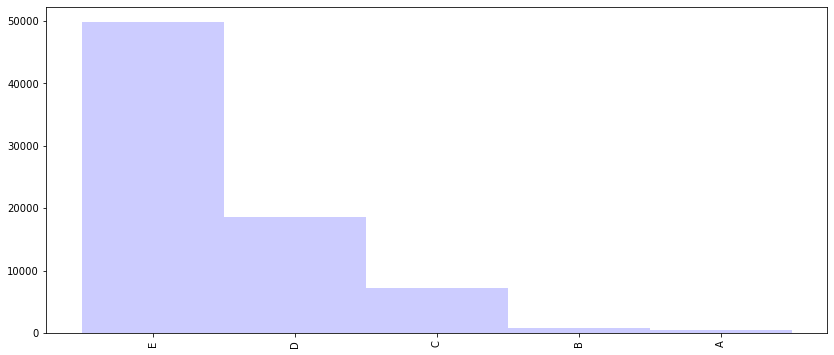

In [15]:
freq_quantitativas['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(14,6))

> ### Conclusões

Como esperado, é notado que apresenta-se um grande desequilíbrio entre as classes de renda através dos dados coletados sendo as classes mais baixas a mais numerosa através da frequência observada e reduzindo a medida que a renda cresce.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

C:\Users\Pichau\aanaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de frequências - Idade'}, xlabel='Idade', ylabel='Density'>

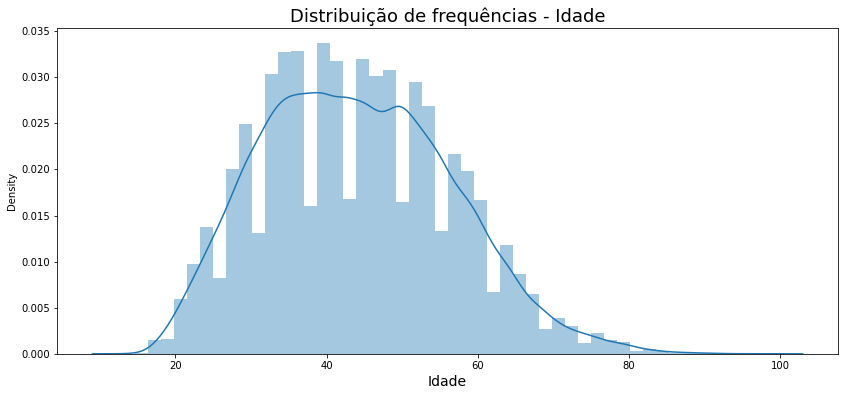

In [16]:
ax = sns.distplot(dados.Idade)

ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de frequências - Idade', fontsize = 18)
ax.set_xlabel('Idade', fontsize = 14)
ax

C:\Users\Pichau\aanaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de frequências - Renda'}, xlabel='Renda', ylabel='Density'>

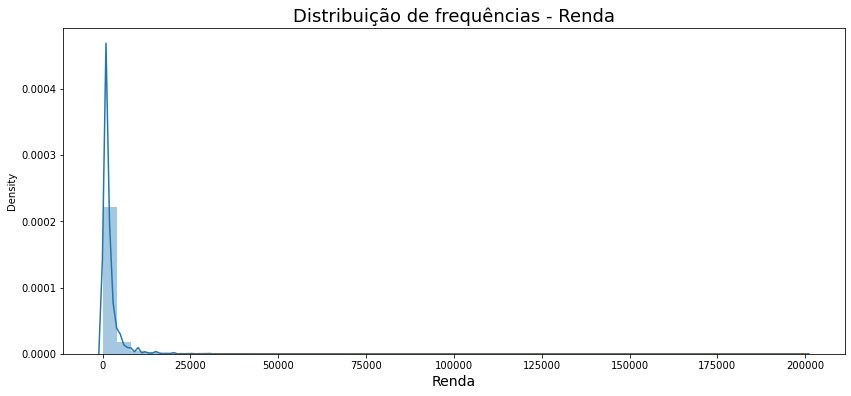

In [17]:
ax = sns.distplot(dados.Renda)

ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de frequências - Renda', fontsize = 18)
ax.set_xlabel('Renda', fontsize = 14)
ax

C:\Users\Pichau\aanaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de frequências - Altura'}, xlabel='Altura', ylabel='Density'>

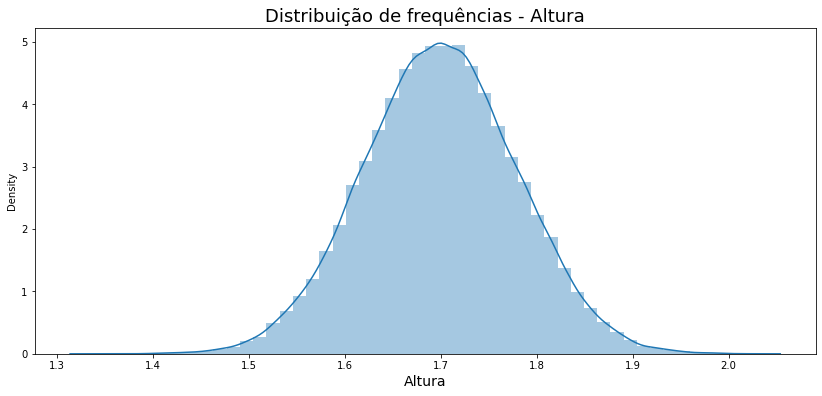

In [18]:
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de frequências - Altura', fontsize = 18)
ax.set_xlabel('Altura', fontsize = 14)
ax

> ### Conclusões

Idade: É observada uma distribuição que se assemelha a uma curva normal. Dada a característica de que os indivíduos entrevistados são os representantes do lar, é de se esperar tal observação, ainda que talvez não retrate a realidade da população como um todo.

Renda: Aqui mais uma vez se exemplifica a grande distorção da distribuição de renda já realizada acima.

Altura: Dado que essa variável foi criada de maneira artificial para meios didáticos pelo professor do curso, é de se esperar que a curva apresente uma típica forma normal visto que essa era a intenção na sua montagem.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

C:\Users\Pichau\aanaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Renda', ylabel='Density'>

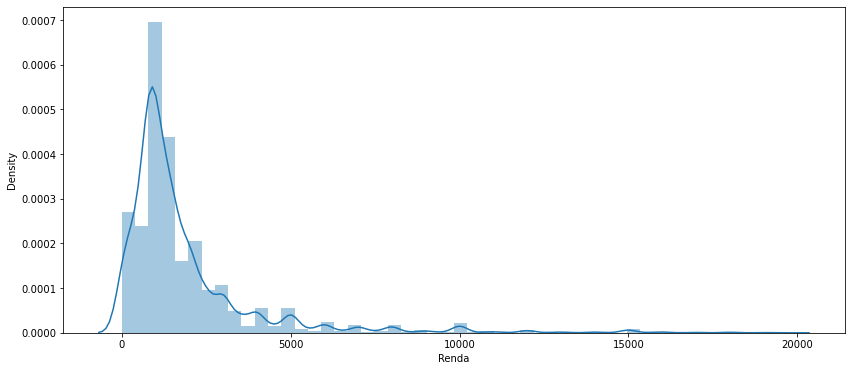

In [19]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(14,6)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [20]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [21]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [22]:
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize = True) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Dada a observação realizada apenas entre os indivíduos que são os representantes dos lares entrevistados, nota-se que em sua maioria, estes representantes são homens, e no geral, a cor Branca e Parda fora as mais observadas seguida por Preta, e tendo Indígena e Amarela com quantidade bem pequenas e menos significativas na amostra.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [23]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [24]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [25]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [26]:
dados.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [27]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [28]:
dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [29]:
renda_por_sexo_e_cor = pd.crosstab(dados.Cor,
                                  dados.Sexo,
                                  values = dados.Renda,
                                  aggfunc = {'mean', 'median', 'max'})
renda_por_sexo_e_cor.rename (index = cor, inplace = True)
renda_por_sexo_e_cor.rename (columns = sexo, inplace = True)
renda_por_sexo_e_cor

max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

Primeiramente, nota-se uma nítida disparidade entre salários de homens e mulheres, sendo quase unânime tanto em máximo, média e mediana que os maiores valores observados são de homens. A única cor que inverte o máximo e a média está na cor indígena, aqui por sua vez, existe grande disparidade para mulheres em detrimento de homens.

Com relação aos maiores salários, a cor branca se destaca com o maior máximo observado. Outro ponto que se destaca é relativo a presença de liderança em média e mediana da cor Amarela, esse fator poderia ser explicado por conta de uma menor população da cor em questão, sendo necessárias novas análise para comprovação desta tese.

Por fim, a cor indígena tem-se como destaque negativo dentre as menores máximas, média (homens), e mediana. Esse ponto pode ser melhor explicado na observação abaixo.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [30]:
renda_por_sexo_e_cor = pd.crosstab(dados.Cor,
                                  dados.Sexo,
                                  values = dados.Renda,
                                  aggfunc = {'mad', 'var', 'std'})
renda_por_sexo_e_cor.rename (index = cor, inplace = True)
renda_por_sexo_e_cor.rename (columns = sexo, inplace = True)
renda_por_sexo_e_cor

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

> ### Conclusões

Conforme observado acima, a classe amarela apresenta maior desvio médio absoluto e desvio padrão. Essa observação fica em linha com a tese anterior de que esta cor possua uma população menor dado que indivíduos que se distancie dos pontos médios acabam tendo maior impacto no valor de populações menores.

Seguindo esta mesma tendência, a população branca vem em segundo lugar em relação as medidas de dispersão, denotando maior afastamento das médias do que as demais cores.

Por fim, nota-se menores medidas de dispersão em torno das populações mais pobres (preta, parda e indígena).

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Box-plot da Renda por Sexo e Cor'}, xlabel='Renda', ylabel='Cor'>

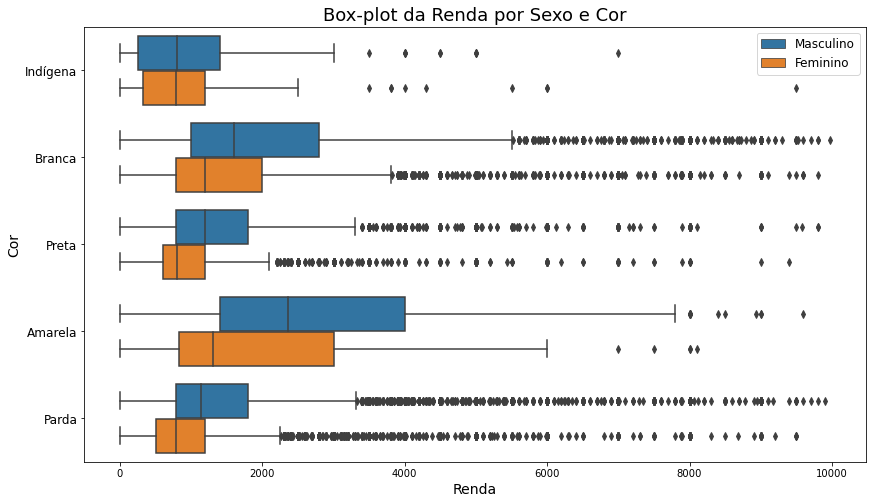

In [31]:
ax = sns.boxplot (x = 'Renda', y = 'Cor', hue = 'Sexo', data = dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches (14,8)
ax.set_title('Box-plot da Renda por Sexo e Cor', fontsize = 18)
ax.set_xlabel('Renda', fontsize=14)
ax.set_ylabel('Cor', fontsize=14)
ax.set_yticklabels(['Indígena','Branca','Preta','Amarela','Parda'], fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino','Feminino'],fontsize=12)
ax

> ### Conclusões

O box-plot corrobora com as conclusões acima, em que se observa maior dispersão entre brancos e amarelos, equnatos em pretos, pardos e indígenas os valores são mais próximos em torno da média. 

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [32]:
from scipy import stats

percentual = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
print("{0:.2f}%".format(percentual))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [33]:
valor = dados.Renda.quantile(.99)
print("R$ {0:.2f}".format(valor))

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [34]:
renda_estatisticas_por_estudo_e_sexo = pd.crosstab(dados['Anos de Estudo'],
                                                  dados.Sexo,
                                                  aggfunc = {'mean', 'median', 'max', 'std'},
                                                  values = dados.Renda).round(2)
renda_estatisticas_por_estudo_e_sexo.rename (index = anos_de_estudo, inplace = True)
renda_estatisticas_por_estudo_e_sexo.rename (columns = sexo, inplace = True)
renda_estatisticas_por_estudo_e_sexo

max               mean           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano     30000    10000    799.49   516.20   
1 ano                              30000     2000    895.63   492.77   
2 anos                             40000     4000    931.18   529.91   
3 anos                             80000     3500   1109.20   546.85   
4 anos                             50000    10000   1302.33   704.28   
5 anos                             35000     8000   1338.65   781.39   
6 anos                             25000     6000   1448.88   833.73   
7 anos                             40000     9000   1465.50   830.75   
8 anos                             30000    18000   1639.40   933.62   
9 anos                             60000    20000   1508.04   868.02   
10 anos                            45000     6000   1731.27   925.92   
11 anos                           200000   100000   2117.06  1286.79   
12 anos                            30000   120000   2470.33  1682.31   
13 anos                            25000    20000   3195.10  1911.73   
14 anos                            50000    20000   3706.62  2226.46   
15 anos ou mais                   200000   100000   6134.28  3899.51   
Não determinados                    7000     3000   1295.76   798.17   

                                  median                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     700.0    390.0   1023.90   639.31  
1 ano                              788.0    400.0   1331.95   425.29  
2 anos                             788.0    450.0   1435.17   498.23  
3 anos                             800.0    500.0   2143.80   424.12  
4 anos                            1000.0    788.0   1419.82   629.55  
5 anos                            1045.0    788.0   1484.65   635.78  
6 anos                            1200.0    788.0   1476.63   574.55  
7 anos                            1200.0    788.0   1419.71   602.04  
8 anos                            1300.0    800.0   1515.58   896.78  
9 anos                            1200.0    788.0   2137.66   973.22  
10 anos                           1218.0    800.0   2078.61   620.61  
11 anos                           1500.0   1000.0   2676.54  1819.04  
12 anos                           1800.0   1200.0   2268.08  4851.83  
13 anos                           2400.0   1300.0   2797.12  2053.79  
14 anos                           2500.0   1600.0   3987.21  2064.08  
15 anos ou mais                   4000.0   2800.0   7447.61  4212.77  
Não determinados                  1200.0    788.0    979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Box-plot de Renda por Sexo e Anos de Estudo'}, xlabel='Renda', ylabel='Anos de Estudo'>

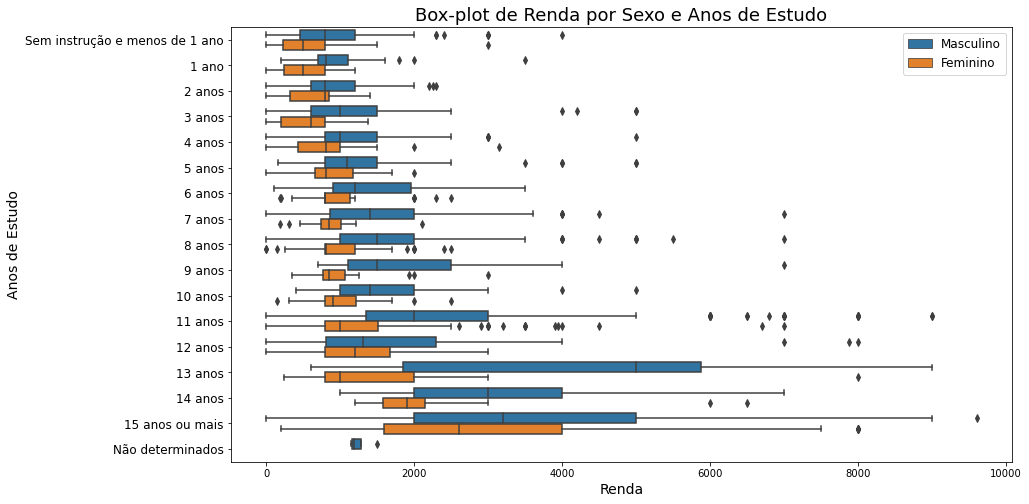

In [35]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query ('Renda < 10000 and Idade == 50'), orient='h')

ax.figure.set_size_inches(14,8)
ax.set_title('Box-plot de Renda por Sexo e Anos de Estudo', fontsize = 18)
ax.set_xlabel('Renda', fontsize = 14)
ax.set_ylabel('Anos de Estudo', fontsize = 14)
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize = 12)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)

ax

> ### Conclusões

Os dados demonstram uma superioridade de renda por anos de estudo observados em homens em todas as faixas de anos de estudo.

É válido apontar também que, no caso de 15 anos ou mais, os box-plots estão mais próximos do que observado nas demais faixas de anos, isso pode ser notado visto que, no caso de carreiras mais acadêmica-intensivas, as mulheres tende a apresentar melhores faixas de renda se aproximando de homens, ainda que com rendas menores no geral.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [36]:
renda_estatistica_por_uf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_estatistica_por_uf.rename(index=uf)

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<AxesSubplot:title={'center':'Box-plot de Renda por Estados'}, xlabel='Renda', ylabel='Estados'>

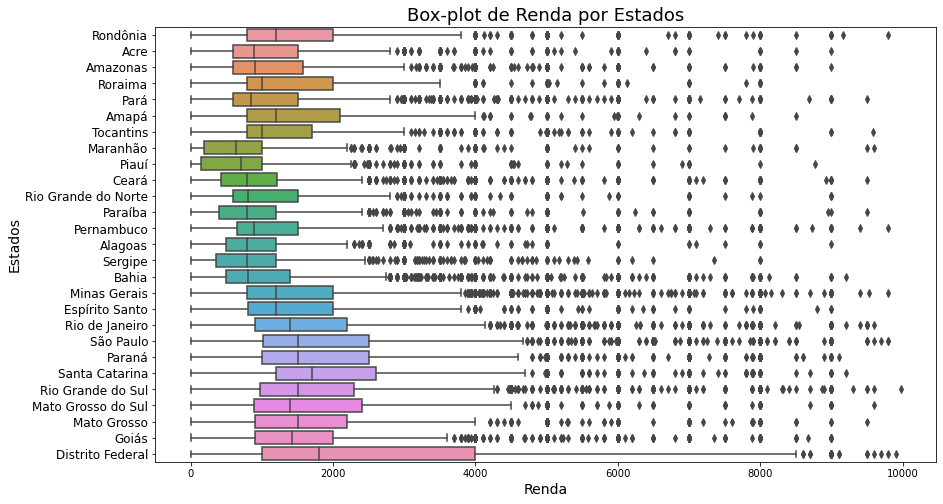

In [37]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query ('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14,8)
ax.set_title('Box-plot de Renda por Estados', fontsize = 18)
ax.set_xlabel('Renda', fontsize = 14)
ax.set_ylabel('Estados', fontsize = 14)
ax.set_yticklabels([key for key in uf.values()], fontsize = 12)

ax

> ### Conclusões

É observado que as maiores rendas se encontra em estados das regiões Sul, Sudeste e Centro-Oeste, além do Distrito Federal.